# Lecture 17 - Random Numbers in Python & Monte Carlo - HW 8

## 1) Random Numbers and Radio Activity

The isotope $^{213}$Bi decays to stable $^{209}$Bi via one of two different routes, with probabilities and
half-lives thus

<img src="Decay9.jpg" alt="Decay process for Bi213 to Bi209" title="Bismuth Decay" />

(Technically, $^{209}$Bi isnt really stable, but it has a half-life of more than $10^{19}$ years, a billion
times the age of the universe, so it might as well be.)

Starting with a sample consisting of 10,000 atoms of $^{213}$Bi, simulate the decay of the atoms
by dividing time into slices of length $\delta t = 1$s each and on each step doing
the following:

1. For each atom of $^{209}$Pb in turn, decide at random, with the appropriate probability, whether it decays or not. (The probability can be calculated from $p(t) = 1 − 2t/\tau $, where $\tau$ is the half life.) Count the total number that decay, subtract it from the number of $^{209}$Pb atoms, and add it to the number of $^{209}$Bi atoms.

2. Now do the same for $^{209}$Tl, except that decaying atoms are subtracted from the total for $^{209}$Tl and added to the total for $^{209}$Pb.

3. For $^{213}$Bi the situation is more complicated: when a $^{213}$Bi atom decays you have to decide at random with the appropriate probability the route by which it decays. Count the numbers that decay by each route and add and subtract accordingly.

Note that you have to work up the chain from the bottom like this, not down from the top,
to avoid inadvertently making the same atom decay twice on a single step.

Keep track of the number of atoms of each of the four isotopes at all times for 20,000 seconds
and make a single graph showing the four numbers as a function of time on the same axes.



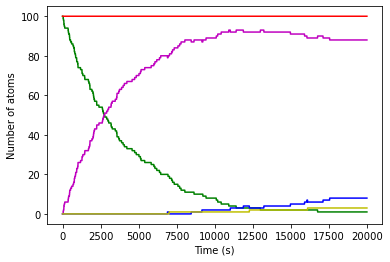

In [2]:
# Write Code Here
#RADIOACTIVE DECAY PLOT. IMPORTANT NOTE! FINAL PLOT IS HERE. IGNORE ANY CELLS THAT FOLLOW THIS ONE IN THIS DOCUMENT.
#Note 2: Lead-209 half-life is about 3.3 hours, not 3.3 minutes.

import numpy as np
from numpy import arange
from pylab import plot,xlabel,ylabel,show

# Initial Atom Count
NBi213 = 100             # Number of bismuth atoms
NTl = 0                  # Number of thallium atoms
NPb = 0                  # Number of lead atoms
NBi209 = 0               # Number of decayed bismuth atoms
tmax = 20000

# Constants
tauTl = 2.2*60           # Half life of thallium in seconds
tauBi213 = 46*60         # Half life of Bi-213 in seconds
tauPb = 3.253*3600         # Half life of lead in seconds
h = 1.0                  # Size of time-step in seconds

# Probabilities of decay
#p = 1 - 2**(-h/tau)   # Probability of decay in one step
pBi = (1 - 2**(-h/tauBi213))
pPb1 = (1 - 2**(-h/tauPb))
pPb2 = (1 - 2**(-h/tauPb)) * 0.9791
pTl = (1 - 2**(-h/tauBi213)) * 0.0209

# Lists of plot points
tpoints = arange(0.0,tmax,h) # make time array
Tlpoints = []
Pbpoints = []
Bi213points = []
Bi209points = []
total_atoms_points = []

# Main loop
for t in tpoints:
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)
    Bi213points.append(NBi213)
    Bi209points.append(NBi209)

    #Track total number of atoms for debugging
    total_atoms = NBi213 + NTl + NPb + NBi209
    total_atoms_points.append(total_atoms)

    # Calculate the number of atoms that decay (Reversed Order)
    #Part 1- Pb to Bi-209
    decay = 0
    for i in range(NPb):
        if np.random.random() < pPb1:
            decay += 1
    NPb -= decay
    NBi209 += decay
    
    #Part 2- Tl to Pb
    decay = 0
    for i in range(NTl):
        if np.random.random() < pTl:
            decay += 1
    NTl -= decay
    NPb += decay
    
    #Part 3- Bismuth-213 to Tl and Pb
    decay = 0
    for i in range(NBi213):
        if np.random.random() < pBi:
            decay += 1
    NBi213 -= decay
    NTl += decay

# Make the graph
plot(tpoints,Bi213points, c='g')
plot(tpoints,Tlpoints, c='m') # plot Tl vs. time
plot(tpoints,Pbpoints, c='b') # plot Pb vs. time
plot(tpoints,Bi209points, c='y')
plot(tpoints,total_atoms_points, c='r')
xlabel("Time (s)")
ylabel("Number of atoms")
show()

## 2) Lets Make a Deal
Monte Carlo methods are often useful to ensure that our thinking is reasonable. A good
example of this kind of use is to investigate a simple problem that generated much attention
several years ago and for which many mathematicians obtained an incorrect solution.

The problem was the analysis of the optimal strategy in a television game show popular at
the time. The show was Lets Make a Deal with host Monty Hall. At some point in the show,
a contestant was given a choice of selecting one of three possible items, each concealed behind
one of three closed doors. The items varied considerably in value.

After the contestant made a choice but before the chosen door was opened, the
host, who knew where the most valuable item was, would open one of the doors
not selected and reveal a worthless item.

**The host would then offer to let the contestant select a different door from what was originally
selected. The question, of course, is should the contestant switch?**

<img src="Monty_Hall_Problem.jpg" alt="Decay process for Bi213 to Bi209" title="Bismuth Decay" />



Much interest in this problem was generated when it was analyzed by a popular magazine
writer, Marilyn vos Savant, who concluded that the optimal strategy is to switch. This
strategy is counterintuitive to many mathematicians, who would say that there is nothing to
be gained by switching; that is, that the probability of improving the selection is 0.5. Study
this problem by Monte Carlo methods. Be careful to understand all of the assumptions

**Write a code that implement this test for 1000 “games”, 500 where the contestant choose to KEEP their choice of door, and 500 where contestant chooses to CHANGE their choice of door:**


## Determine if there is probability of improving the selection by switching, and if so by how much?



In [98]:
# Write Code Here
#doorX= 'Zonk'
#doorY= 'SmallPrize'
#doorZ= 'BigPrize'

import random
import numpy as np
from numpy import arange
from random import choice #Necessary to avert AttributeError

# Initial Conditions
NDoors = 3
doors = [1, 2, 3]
results = ["Big Prize", "Small Prize", "Zonk"]
NGames = 1000
random.shuffle(results)
RandResult = dict(zip(doors, results))
#RandResults = dict(zip(contestant_choices, results)) #Must be present in the main loop to avoid KeyError in the code.

    #Make sure same number of parentheses are present at the start and the end!

#NKeep = 500
#NChange = 500
#NGames = 1000
#NUndecided = 1000
#h = 1                          #Step size

# Probabilities
#pKeep = 0.5
#pChange = 0.5

# Main loop
# Don't randomize the number of contestants that keep vs switch their doors
# Randomize the door picked by each contestant, and the door with each prize behind it

def game(): 
    initial_door = random.choice(doors)  # Initial selection
    choice = random.choice(["Keep", "Change"])
    
    if choice == "keep": 
        final_door = initial_door
        
    else: 
        final_door = random.choice([door for door in doors if door != initial_door])
        
    return {"initial_door": initial_door, "choice": choice, "final_door": final_door}

#Value of prizes, 3 being the best
prize_rankings = {"Big Prize": 3, "Small Prize": 2, "Zonk": 1}
better_by_switching_count = 0 #Initial value

#Set up for all games to run
games = [game() for n in range(NGames)]

for n in range(NGames):
    random.shuffle(results)
    
    contestant_choices = [1, 2, 3]  # Keep as a list
    RandResults = dict(zip(contestant_choices, results))  # Map doors to shuffled results
    
    # Get the initial door and make a choice
    initial_door = random.choice(contestant_choices)
    choice = random.choice(["Keep", "Change"])
    
    if choice == "Keep":
        final_door = initial_door
    else:
        final_door = random.choice([door for door in contestant_choices if door != initial_door])
    
    # Get the prize for both initial and final doors
    initial_prize = RandResults[initial_door]
    final_prize = RandResults[final_door]
    
    if final_door in RandResults and RandResults[final_door] in prize_rankings:
        if prize_rankings[RandResults[final_door]] > prize_rankings[RandResults[initial_door]]:
            better_by_switching_count += 1
    else:
        print(f"Error: {final_door} or its prize not found in prize_rankings")
    
for i, game in enumerate(games[:10]): 
    initial_door = random.choice(doors)
    
    contestant_choice = random.choice(doors)
    
    prize = RandResult[contestant_choice]
    print(f"Game {i+1}: Initial={game['initial_door']}, choice={game['choice']}, Final={game['final_door']}, Contestant {i+1} got the {prize}") #i+1 is because i starts at 0

    if prize_rankings[final_prize] > prize_rankings[initial_prize]: #Must use final and initial prize, not final and initial door, because of a key error.
        better_by_switching_count += 1

# Code for the probability
probability_better_by_switching = better_by_switching_count / NGames
print(f"Probability of getting a better prize by switching: {probability_better_by_switching:.2%}")


#for g in gpoints:
#    keep_points.append(NKeep)
#    change_points.append(NChange)
#
#    #Track total number of games for debugging/spotting mistakes
#    NGames = NKeep+NChange
#    total_games_points.append(NGames)
#
#    # Calculate the number of doors kept and changed
#    
#    #Part 1- Which door has the big prize?
#    Kept = 0
#    NDoors = []
#    for i in range(0, 1000): 
#        n = np.random.randint(0, 2)
#        NDoors.append(n)
#        Kept += 1
#    NUndecided -= Kept
#    NKeep += Kept
#    
#    #Part 2- Which door does each contestant pick?
#    Changed = 0
#    NDoors = []
#    for i in range(0, 1000): 
#        n = np.random.randint(0, 2)
#        NDoors.append(n)
#        Changed += 1
#    NUndecided -= Changed
#    NChange += Changed
#    
#    #Part 3- Keep or Change?
#    Kept = NKeep
#    Changed = NChange
    
#Part 4- Code that shows whether a contestant's decision was right or not
print('The results suggest that switching doors yields a probability of between 22% and 27% for getting a better prize.   Therefore there usually is nothing to gain, and the risk of loss is significant, from switching doors.')

#Remember that results need to be shown via print statements.

Game 1: Initial=2, choice=Change, Final=1, Contestant 1 got the Small Prize
Game 2: Initial=3, choice=Keep, Final=2, Contestant 2 got the Small Prize
Game 3: Initial=1, choice=Keep, Final=2, Contestant 3 got the Small Prize
Game 4: Initial=2, choice=Change, Final=1, Contestant 4 got the Big Prize
Game 5: Initial=2, choice=Keep, Final=3, Contestant 5 got the Big Prize
Game 6: Initial=2, choice=Change, Final=3, Contestant 6 got the Big Prize
Game 7: Initial=3, choice=Keep, Final=1, Contestant 7 got the Zonk
Game 8: Initial=1, choice=Keep, Final=2, Contestant 8 got the Big Prize
Game 9: Initial=2, choice=Change, Final=3, Contestant 9 got the Zonk
Game 10: Initial=1, choice=Change, Final=3, Contestant 10 got the Zonk
Probability of getting a better prize by switching: 26.60%
The results suggest that switching doors yields a probability of between 22% and 27% for getting a better prize.   Therefore there usually is nothing to gain, and the risk of loss is significant, from switching doors.


In [93]:
=

SyntaxError: invalid syntax (1763773627.py, line 1)